Quick and dirty look at the causes of workplace injuries. Data obtained from Kaggle.com and, while not a very comprehensive list (sample size is only 537), I'm using this as more of an experiment with Jupyter notebook and pelican.

In [2]:
import csv
import pprint

with open('../data/injuries.csv') as csvfile:
    df = csv.reader(csvfile, delimiter=',')
    next(df)
    
    injury_collection = {}
    row_count = 0
    
    for i in df:
        row_count += 1
        injury_type = i[2]
        if injury_type in injury_collection:
            injury_collection[injury_type] += 1
        else:
            injury_collection[injury_type] = 1
        if row_count == 20:
            break
        
    pprint.pprint(injury_collection)
    print 'Total injury types in first 20 lines:',len(injury_collection)


{'Bombing, arson': 1,
 'Hanging, strangulation, asphyxiation\x97intentional self-harm': 1,
 'Hitting, kicking, beating, shoving': 1,
 'Intentional injury by other person': 1,
 'Intentional injury by other person, n.e.c.': 1,
 'Intentional injury by other person, unspecified': 1,
 'Intentional injury by person': 1,
 'Intentional injury by person, unspecified': 1,
 'Jumping from building or other structure\x97intentional self-harm': 1,
 'Multiple violent acts by other person': 1,
 'Rape, sexual assault ': 1,
 'Self-inflicted injury\x97intentional ': 1,
 'Self-inflicted injury\x97intentional, unspecified': 1,
 'Shooting by other person\x97intentional': 1,
 'Shooting\x97intentional self-harm': 1,
 'Stabbing, cutting, slashing, piercing': 1,
 'Strangulation by other person': 1,
 'Threat, verbal assault': 1,
 'VIOLENCE AND OTHER INJURIES BY PERSONS OR ANIMALS': 1,
 'Violence and other injuries by persons or animals, unspecified': 1}
Total injury types in first 20 lines: 20


I cut this early.. It appears the dataset needs a lot of cleaning.. Pretty much every single entry is listed as a unique type..  Next step is to aggregate similar categories together:

In [55]:
import csv
import pprint

with open('../data/injuries.csv') as csvfile:
    df = csv.reader(csvfile, delimiter=',')
    next(df)
    
    injury_collection = {}
    row_count = 0
    
    for i in df:
        row_count += 1
        injury_type = i[2]
        
        if 'aircraft' in injury_type.lower() or 'in-flight' in injury_type.lower():
            injury_type = 'aircraft'
            
        elif 'animal' in injury_type.lower():
            injury_type = 'animal'
        
        elif 'bending' in injury_type.lower() or 'walking' in injury_type.lower() or 'running' in injury_type.lower() or 'kneeling' in injury_type.lower() or 'jump' in injury_type.lower() or 'sitting' in injury_type.lower() or 'standing' in injury_type.lower() or 'boarding' in injury_type.lower() or 'climbing' in injury_type.lower() or 'slipping' in injury_type.lower():
            injury_type = 'movement'
            
        elif 'bites' in injury_type.lower() or 'bitten' in injury_type.lower():
            injury_type = 'insect'
            
        elif 'aircraft' in injury_type.lower():
            injury_type = 'aircraft'
        
        elif 'bomb' in injury_type.lower() or 'arson' in injury_type.lower():
            injury_type = 'bomb/arson'
            
        elif 'caught' in injury_type.lower() or 'machinery' in injury_type.lower() or 'compressed' in injury_type.lower() or 'structure' in injury_type.lower() or 'equipment' in injury_type.lower():
            injury_type = 'equipment'
        
        elif 'collision' in injury_type.lower():
            injury_type = 'collison'
            
        elif 'contact' in injury_type.lower() or 'exposure' in injury_type.lower() or 'ignition' in injury_type.lower() or 'substance' in injury_type.lower():
            injury_type = 'dangerous substance'
            
        elif 'electricity' in injury_type.lower():
            injury_type = 'electric'   
        
        elif 'drug' in injury_type.lower():
            injury_type = 'drug'
        
        elif 'fall' in injury_type.lower()or 'falls' in injury_type.lower() or 'collapsing' in injury_type.lower():
            injury_type = 'falling'
            
        elif 'explosion' in injury_type.lower():
            injury_type = 'explosion'
            
        elif 'fire' in injury_type.lower():
            injury_type = 'fire'
            
        elif 'drowning' in injury_type.lower() or 'choking on' in injury_type.lower():
            injury_type = 'choking'
            
        elif 'vehicle' in injury_type.lower() or 'overturned' in injury_type.lower() or 'oncoming' in injury_type.lower() or 'vehicular' in injury_type.lower():
            injury_type = 'vehicle'
            
        elif 'unknown' in injury_type.lower():
            injury_type = 'unknown'
        
        elif 'other person' in injury_type.lower() or 'by other' in injury_type.lower():
            injury_type = 'intentional by other'
        
        elif 'self-harm' in injury_type.lower() or 'intentional' in injury_type.lower():
            injury_type = 'self-harm'
            
        elif 'rubbed' in injury_type.lower() or 'repetitive' in injury_type.lower():
            injury_type = 'friction'
            
        elif 'struck' in injury_type.lower():
            injury_type = 'struck'
        
        elif 'transportation' in injury_type.lower() or 'cycle'  in injury_type.lower():
            injury_type = 'transportation'
            
        elif 'overexertion' in injury_type.lower() or 'exertions' in injury_type.lower():
            injury_type = 'overexertion'
        
        else:
            injury_type = 'other'
            
        if injury_type in injury_collection:
            injury_collection[injury_type] += 1
            
        else:
            injury_collection[injury_type] = 1
        
    pprint.pprint(injury_collection)
    print len(injury_collection)
    
    

{'aircraft': 20,
 'animal': 30,
 'bomb/arson': 1,
 'choking': 1,
 'collison': 33,
 'dangerous substance': 66,
 'drug': 3,
 'equipment': 60,
 'explosion': 11,
 'falling': 55,
 'fire': 6,
 'friction': 16,
 'insect': 5,
 'intentional by other': 8,
 'movement': 79,
 'other': 23,
 'overexertion': 33,
 'self-harm': 11,
 'struck': 9,
 'transportation': 6,
 'unknown': 10,
 'vehicle': 51}
22


So a quick condensing of the injury type list knocks it down from over 500 entries to 22 specific injury types.  lets plot it real quick with matplotlib!

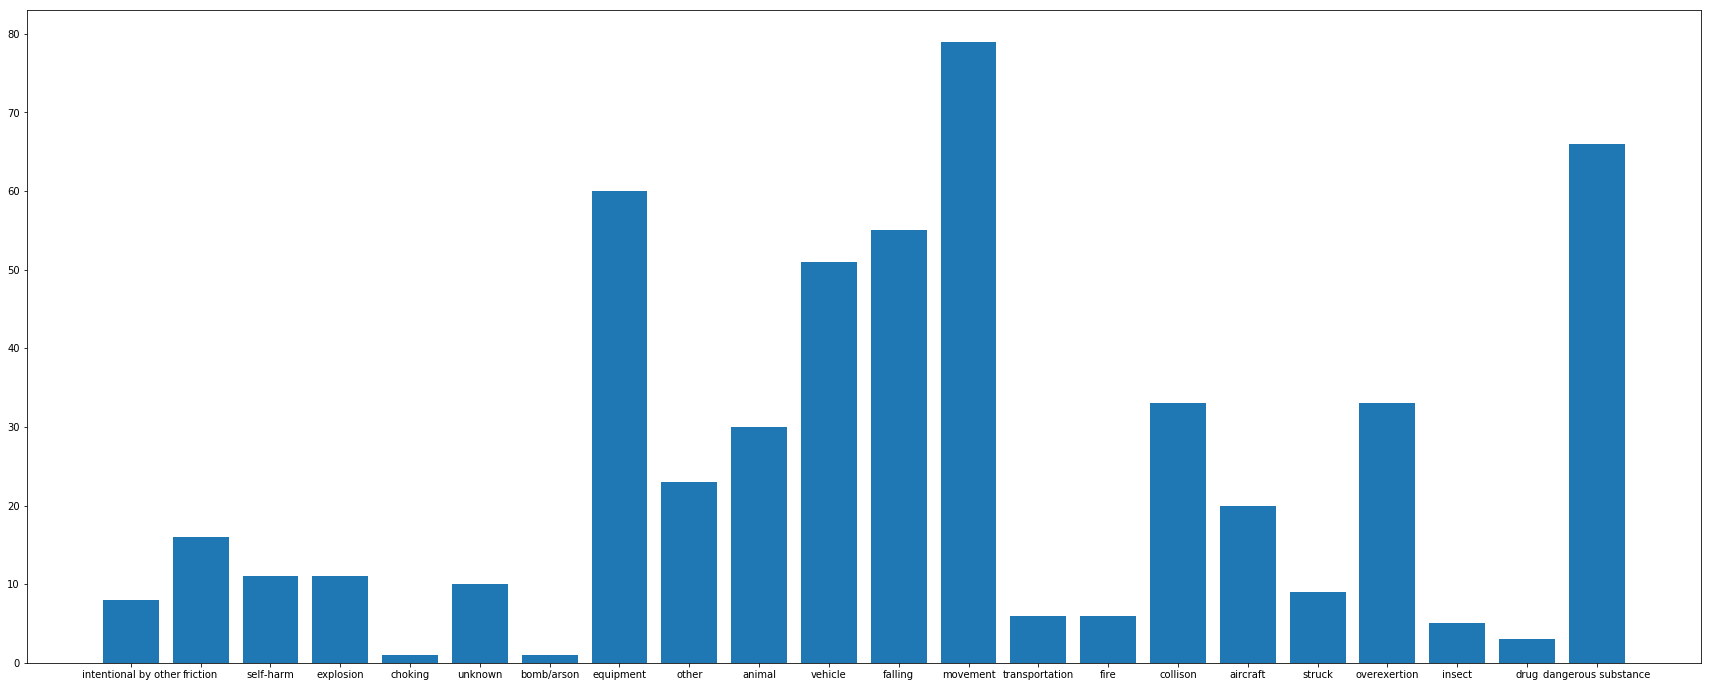

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,12))
plt.bar(range(len(injury_collection)), injury_collection.values(), align='center')
plt.xticks(range(len(injury_collection)), injury_collection.keys())

aplt.show()

A nice dataset to test jupyter and pelican with, yet not much use from this info as I could not determine what company this data is originated from.  Aside from injuries from movements (bending/twisting/running/etc), equipment/machinery incidents and being around dangerous substances appear to be the highest causes of workplace injuries.